In [1]:
#setwd("~//praxiskurs_fss21/")
options(repr.plot.width=8, repr.plot.height=3,repr.plot.res = 300)
library(ggplot2)
library(stringr)
library(magrittr)
library(tidyr)
library(plotly)
library(dplyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Kreisgrenzen: 

https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/esri-de-content::kreisgrenzen-2019/explore?location=51.164250%2C10.454050%2C6.80&showTable=true

Kreisinzidenzen:

https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Kum_Tab.html

In [2]:
df_kreisinzidenz <- readxl::read_excel("data/Fallzahlen_Kum_Tab.xlsx",sheet="LK_7-Tage-Inzidenz (fixiert)",
                                      skip= 4)
df_kreisinzidenz %>%head

New names:
* `` -> ...1



...1,LK,LKNR,18.11.2020,19.11.2020,20.11.2020,21.11.2020,22.11.2020,23.11.2020,24.11.2020,⋯,44335,44336,44337,44338,44339,44340,44341,44342,44343,44344
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,StadtRegion Aachen,5334,211.83930,179.34531,174.31861,161.39283,121.17926,115.9730,149.3647,⋯,93.71196,112.56207,103.40630,97.30246,95.14816,84.73572,80.96570,58.52510,55.11412,50.44648
2,LK Ahrweiler,7131,143.75106,156.05061,159.12550,156.05061,172.19378,139.1387,139.9074,⋯,66.11011,63.03522,62.26650,59.96033,59.96033,55.34800,60.72906,56.11672,53.04183,51.50439
3,LK Aichach-Friedberg,9771,144.81453,138.87342,158.18202,173.77743,167.83632,155.9541,139.6161,⋯,43.07304,40.10248,43.07304,42.33040,40.10248,34.16138,27.47763,20.05124,16.33805,11.88222
4,LK Alb-Donau-Kreis,8425,114.67657,117.21366,123.81010,124.82494,121.78043,122.7953,118.2285,⋯,90.82790,86.76856,77.63502,81.69437,82.20179,80.67953,81.18695,62.91989,59.87538,59.87538
5,LK Altenburger Land,16077,145.42526,153.25585,129.76408,205.83267,212.54461,200.2394,219.2565,⋯,89.49247,61.52607,59.28876,49.22086,60.40741,60.40741,51.45817,25.72908,45.86489,48.10220
6,LK Altenkirchen,7132,63.66212,58.22755,66.76759,90.05862,97.82229,104.8096,104.8096,⋯,81.51857,77.63674,74.53127,71.42580,68.32033,66.76759,72.20217,53.56935,36.48927,42.70021


In [3]:
as.Date(44344,origin="1899-12-30")

[1] "2021-05-28"

In [4]:
df_kreisinzidenz <- df_kreisinzidenz %>% select(-c("...1",LKNR)) %>%
 tidyr::pivot_longer(cols=!LK,names_to = "date",values_to="value") %>% 
    mutate(date=
           ifelse(str_detect(date,"44"),
                as.Date(as.numeric(date),origin="1899-12-30") %>% as.character,
                as.Date(date,format="%d.%m.%Y") %>% as.character
                 ) %>%
           as.Date)
df_kreisinzidenz %>% head

Warning message in as.Date(as.numeric(date), origin = "1899-12-30"):
“NAs introduced by coercion”


LK,date,value
<chr>,<date>,<dbl>
StadtRegion Aachen,2020-11-18,211.8393
StadtRegion Aachen,2020-11-19,179.3453
StadtRegion Aachen,2020-11-20,174.3186
StadtRegion Aachen,2020-11-21,161.3928
StadtRegion Aachen,2020-11-22,121.1793
StadtRegion Aachen,2020-11-23,115.9730


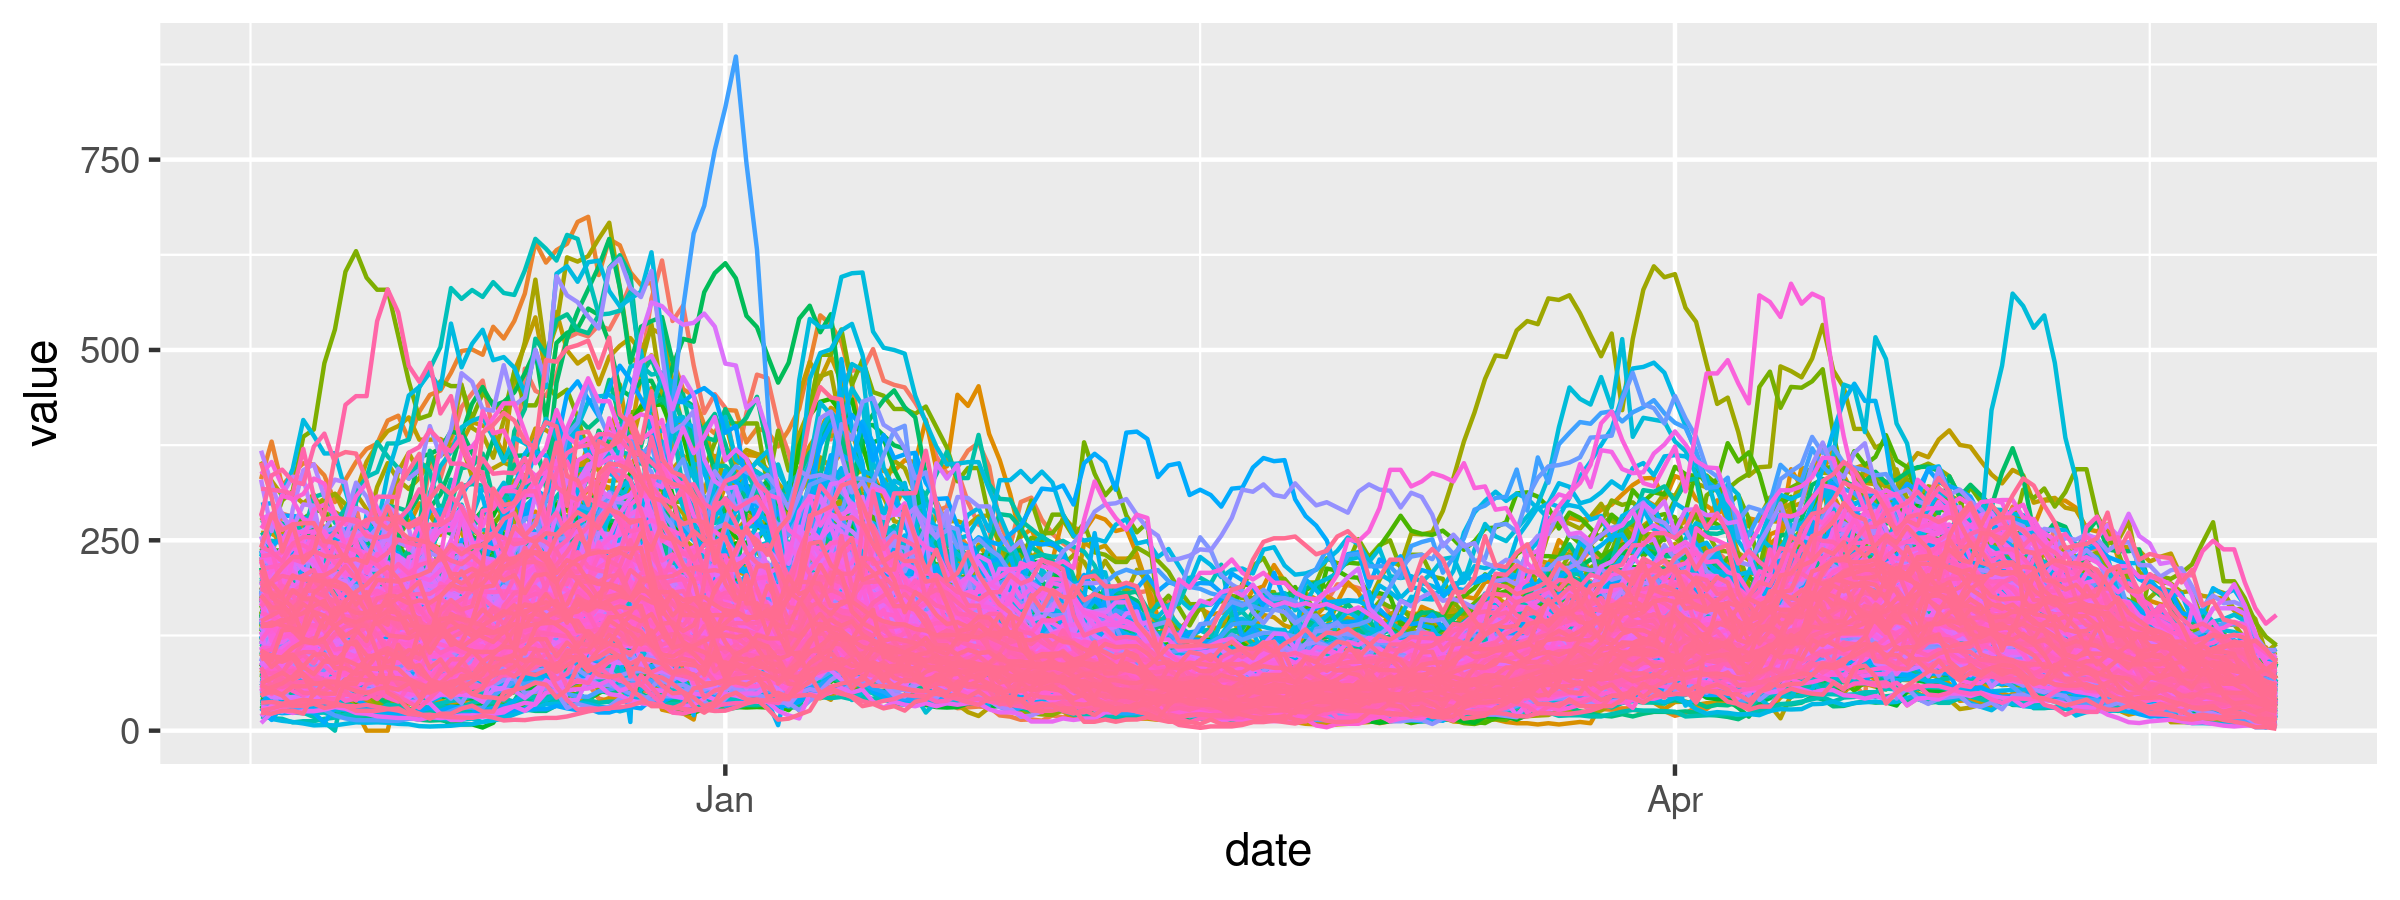

In [5]:
p <-     ggplot(df_kreisinzidenz) + 
    geom_path(aes(x=date,y=value,color=LK))
p + scale_color_discrete(guide=F)

In [6]:
# ggplotly(p)

In [7]:
library(rgdal)
library(broom)
sp_shapes <- readOGR(dsn="data/kreisgrenzen/Kreisgrenzen_2019.shp", stringsAsFactors = F)

Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: /usr/share/proj
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.



OGR data source with driver: ESRI Shapefile 
Source: "/home/afreuden/Documents/praxiskurs_fss21/data/kreisgrenzen/Kreisgrenzen_2019.shp", layer: "Kreisgrenzen_2019"
with 401 features
It has 19 fields


Regions defined for each Polygons



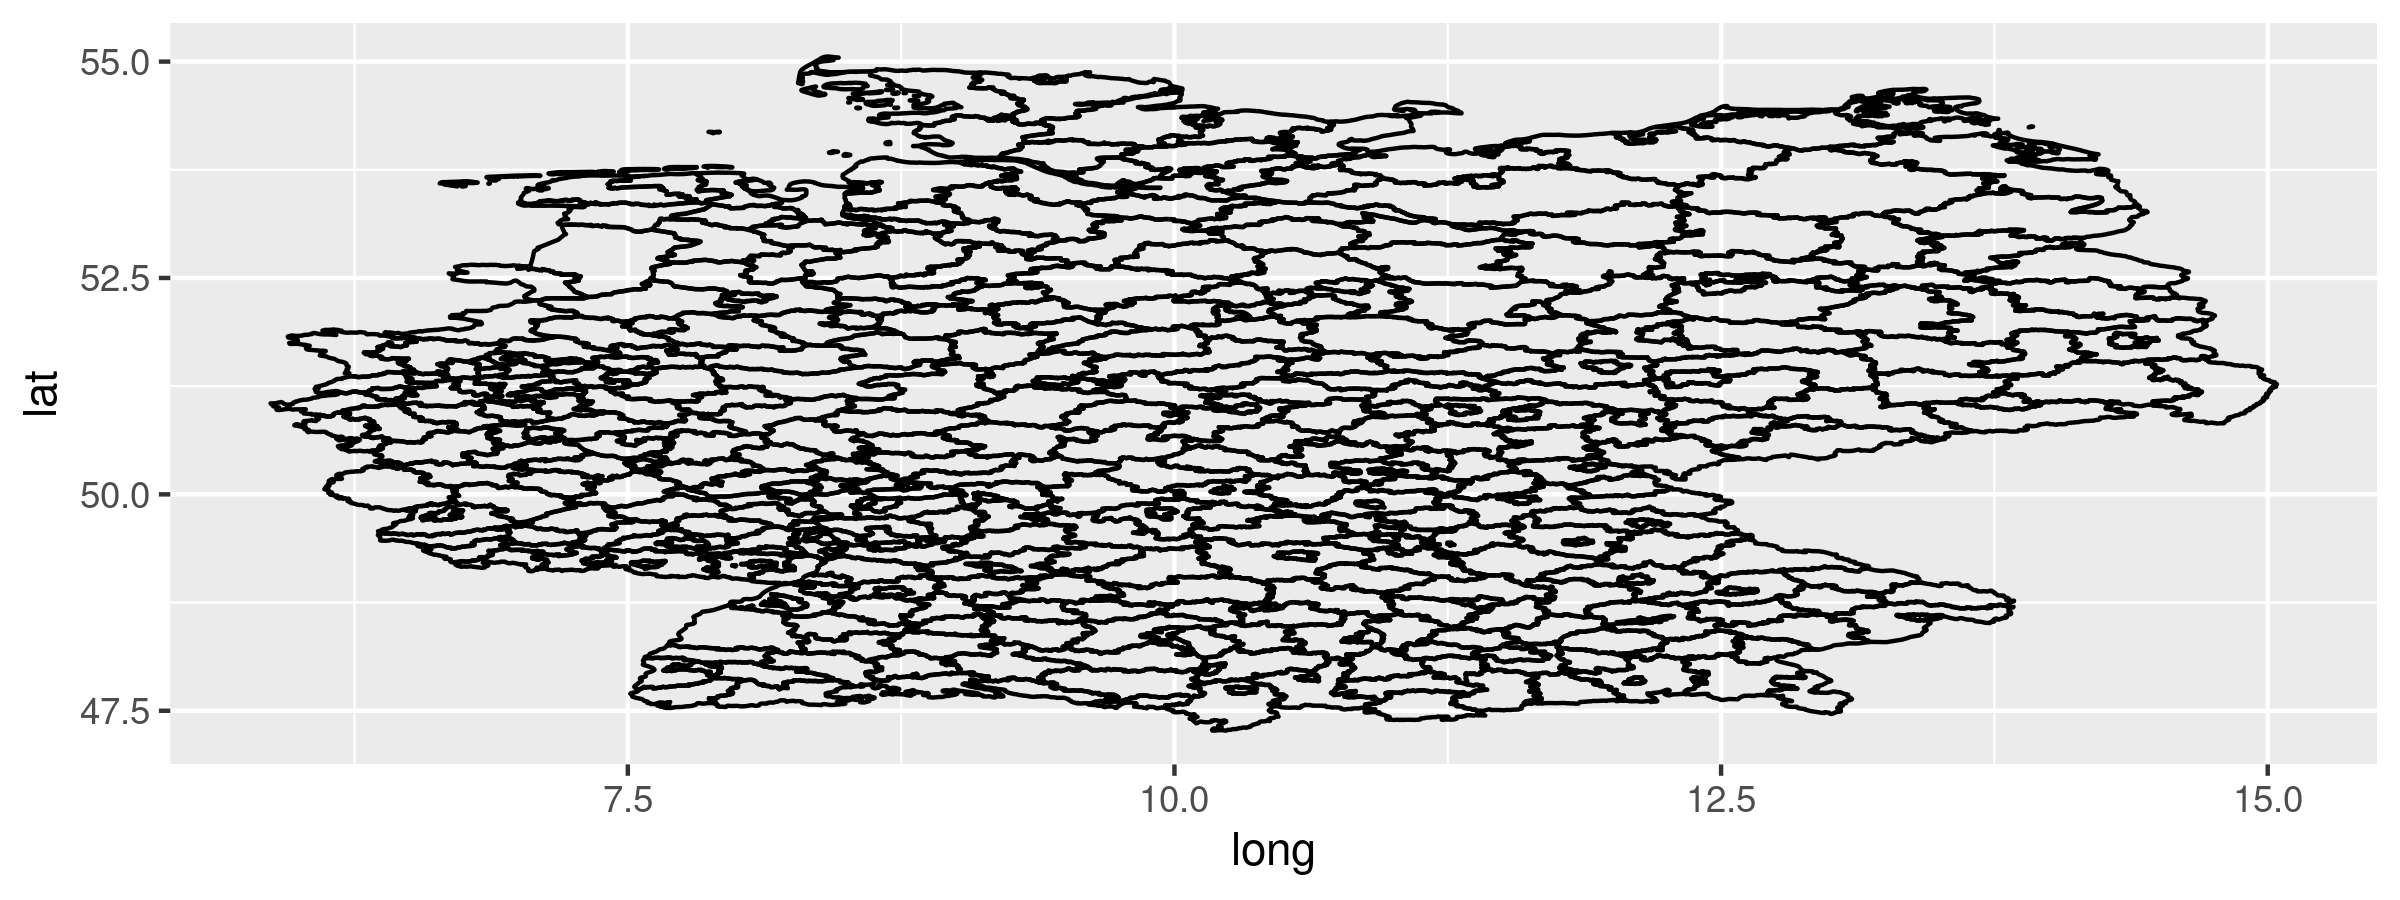

In [8]:
p <- ggplot(sp_shapes) + geom_polygon(aes(x=long,y=lat,group=group), colour = "black", fill = NA)
p

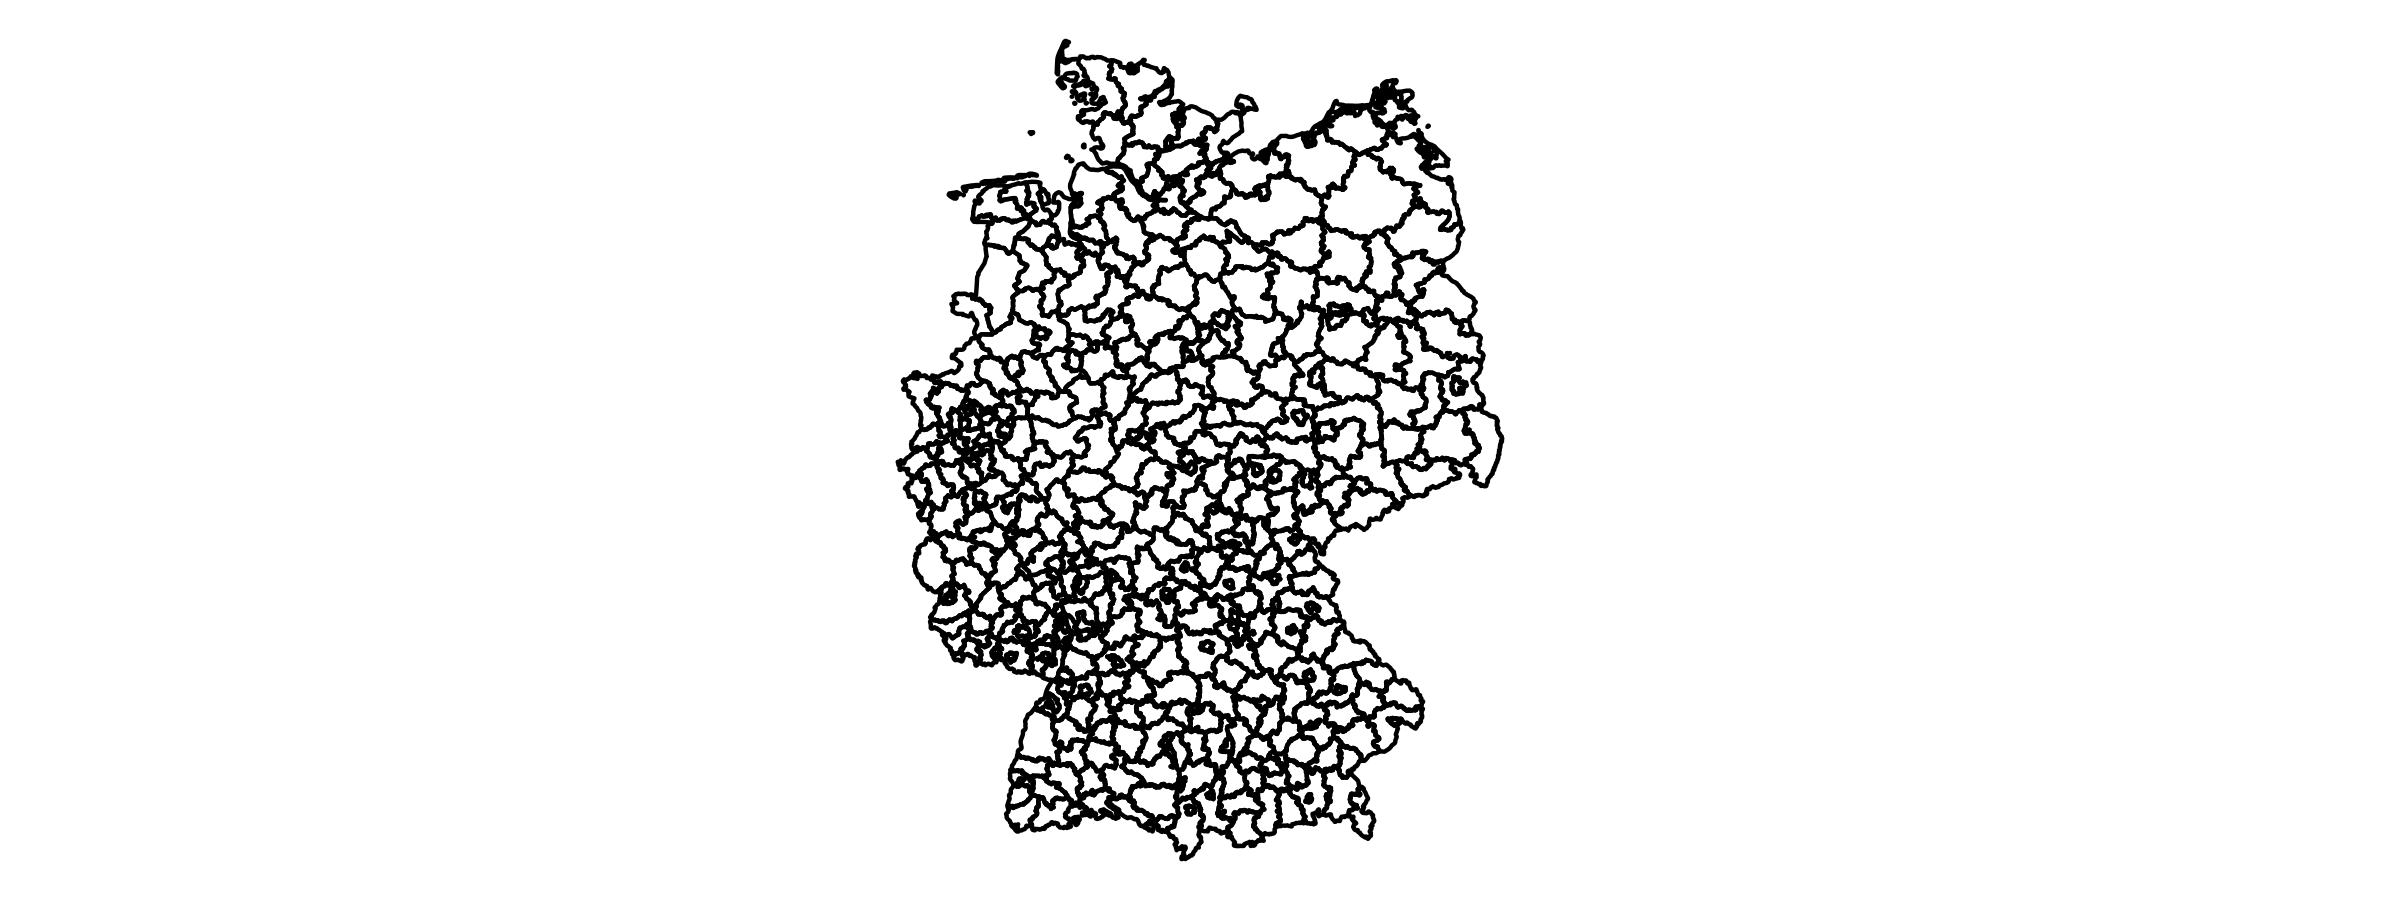

In [9]:
p + theme_void() + coord_quickmap()

In [10]:
sp_shapes@data %>% str

'data.frame':	401 obs. of  19 variables:
 $ FID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ RS        : chr  "01001" "01002" "01003" "01004" ...
 $ AGS       : chr  "01001" "01002" "01003" "01004" ...
 $ SDV_RS    : chr  "010010000000" "010020000000" "010030000000" "010040000000" ...
 $ GEN       : chr  "Flensburg" "Kiel" "Lübeck" "Neumünster" ...
 $ BEZ       : chr  "Kreisfreie Stadt" "Kreisfreie Stadt" "Kreisfreie Stadt" "Kreisfreie Stadt" ...
 $ IBZ       : int  40 40 40 40 42 42 42 42 42 42 ...
 $ BEM       : chr  "--" "--" "--" "--" ...
 $ SN_L      : chr  "01" "01" "01" "01" ...
 $ SN_R      : chr  "0" "0" "0" "0" ...
 $ SN_K      : chr  "01" "02" "03" "04" ...
 $ SN_V1     : chr  "00" "00" "00" "00" ...
 $ SN_V2     : chr  "00" "00" "00" "00" ...
 $ SN_G      : chr  "000" "000" "000" "000" ...
 $ FK_S3     : chr  "R" "R" "R" "R" ...
 $ NUTS      : chr  "DEF01" "DEF02" "DEF03" "DEF04" ...
 $ WSK       : chr  "2008/01/01" "2006/01/01" "2006/02/01" "1970/04/26" ...
 $ SHAPE_Leng: num 

Regions defined for each Polygons



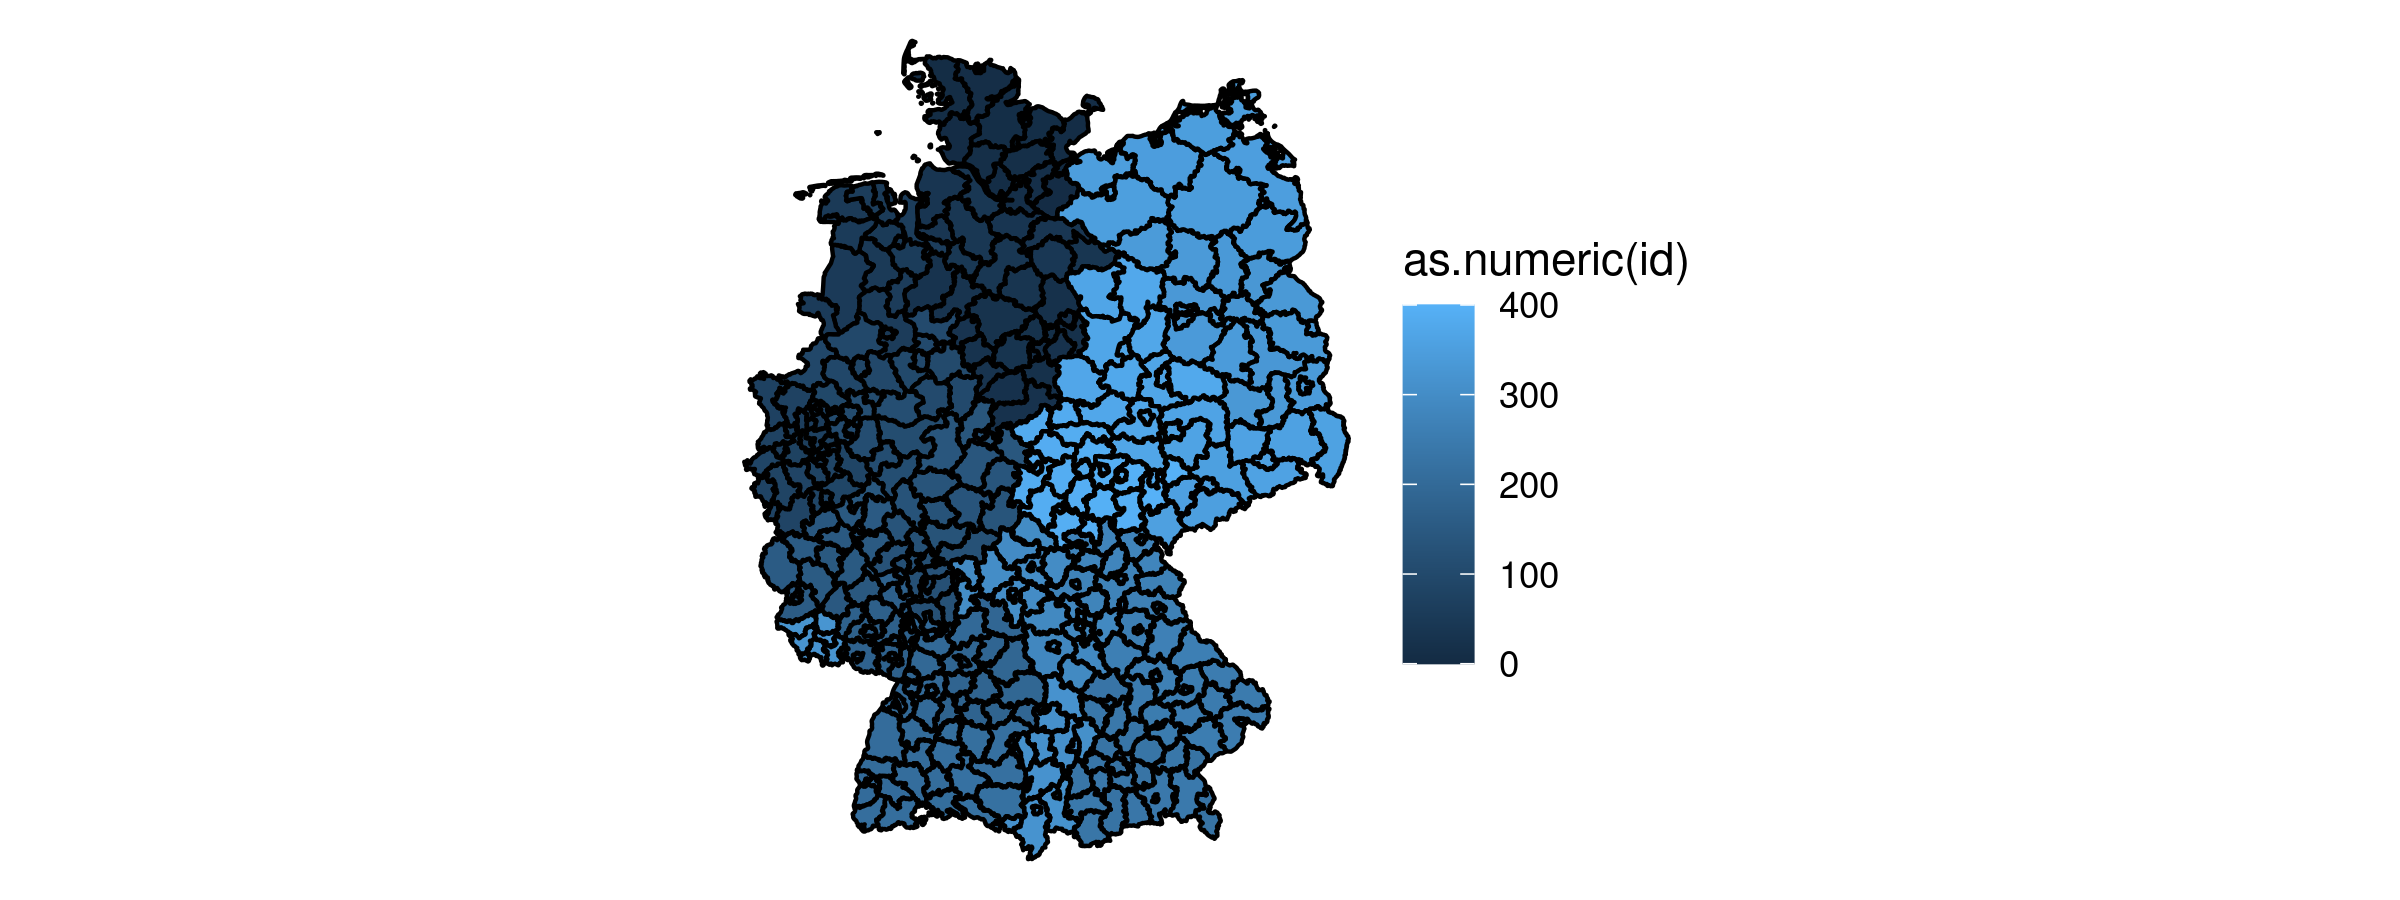

In [11]:
p <- ggplot(sp_shapes) + 
    geom_polygon(aes(x=long,y=lat,group=group,fill=as.numeric(id)), colour = "black") +
    theme_void() + coord_quickmap() 
p

In [12]:
sp_shapes@data %>% head

,FID,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,WSK,SHAPE_Leng,SHAPE_Area
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,01,0,01,00,00,000,R,DEF01,2008/01/01,0.5247214,0.006872722
1,2,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,01,0,02,00,00,000,R,DEF02,2006/01/01,1.2746835,0.015506843
2,3,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,01,0,03,00,00,000,R,DEF03,2006/02/01,1.8345336,0.028927516
3,4,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,01,0,04,00,00,000,R,DEF04,1970/04/26,0.6632619,0.009808368
4,5,01051,01051,010510044044,Dithmarschen,Kreis,42,--,01,0,51,00,00,000,R,DEF05,2011/08/01,3.0733526,0.196087470
5,6,01053,01053,010530100100,Herzogtum Lauenburg,Kreis,42,--,01,0,53,00,00,000,R,DEF06,2009/01/01,3.1720777,0.171336533


In [13]:
df_shapes <- tidy(sp_shapes)
df_shapes %>% str

Regions defined for each Polygons



tibble[,7] [529,330 × 7] (S3: tbl_df/tbl/data.frame)
 $ long : num [1:529330] 9.41 9.41 9.41 9.41 9.42 ...
 $ lat  : num [1:529330] 54.8 54.8 54.8 54.8 54.8 ...
 $ order: int [1:529330] 1 2 3 4 5 6 7 8 9 10 ...
 $ hole : logi [1:529330] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ piece: Factor w/ 38 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ group: Factor w/ 660 levels "0.1","1.1","2.1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id   : chr [1:529330] "0" "0" "0" "0" ...


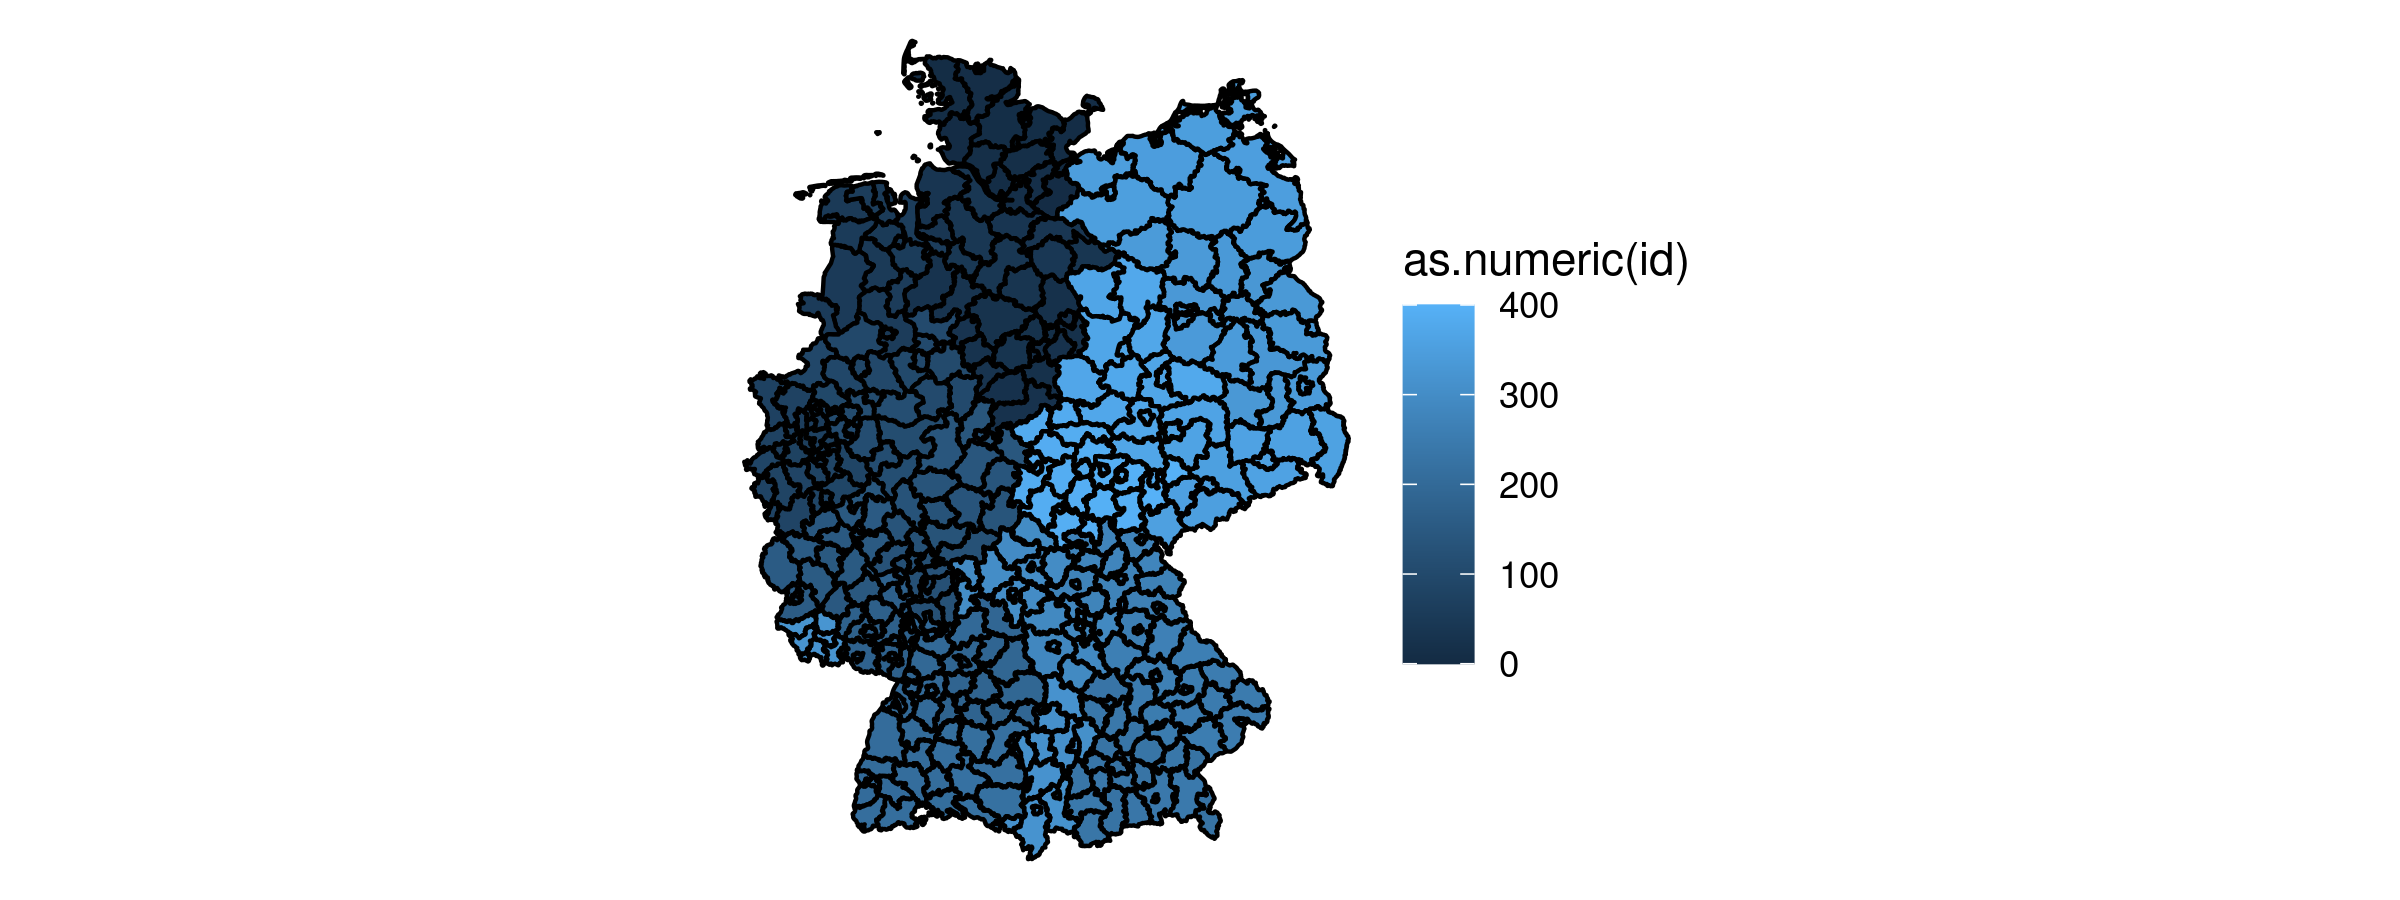

In [14]:
ggplot(df_shapes) + 
    geom_polygon(aes(x=long,y=lat,group=group,fill=as.numeric(id)), colour = "black") +
    theme_void() + coord_quickmap() 

# Aufgabe
Erstellt für den heutigen Tag die Inzidenzkarte für Deutschland, indem ihr die diesen Schritten folgt:
* Entfernt zunächst mithilfe von regex im data frame df_kreisinzidenz das erste Wort, welches die Kategorie des Kreises angibt (Stadtkreis, Landkreis etc)
* Überprüft ob das dazugehörige Leerzeichen im String auch entfernt wurde
* Filtert den Datensatz auf den heutigen Tag und joint ihn mit df_shapes
* Plottet den neuen data frame mithilfe von ggplot

In [15]:
str(sp_shapes@data)

'data.frame':	401 obs. of  19 variables:
 $ FID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ RS        : chr  "01001" "01002" "01003" "01004" ...
 $ AGS       : chr  "01001" "01002" "01003" "01004" ...
 $ SDV_RS    : chr  "010010000000" "010020000000" "010030000000" "010040000000" ...
 $ GEN       : chr  "Flensburg" "Kiel" "Lübeck" "Neumünster" ...
 $ BEZ       : chr  "Kreisfreie Stadt" "Kreisfreie Stadt" "Kreisfreie Stadt" "Kreisfreie Stadt" ...
 $ IBZ       : int  40 40 40 40 42 42 42 42 42 42 ...
 $ BEM       : chr  "--" "--" "--" "--" ...
 $ SN_L      : chr  "01" "01" "01" "01" ...
 $ SN_R      : chr  "0" "0" "0" "0" ...
 $ SN_K      : chr  "01" "02" "03" "04" ...
 $ SN_V1     : chr  "00" "00" "00" "00" ...
 $ SN_V2     : chr  "00" "00" "00" "00" ...
 $ SN_G      : chr  "000" "000" "000" "000" ...
 $ FK_S3     : chr  "R" "R" "R" "R" ...
 $ NUTS      : chr  "DEF01" "DEF02" "DEF03" "DEF04" ...
 $ WSK       : chr  "2008/01/01" "2006/01/01" "2006/02/01" "1970/04/26" ...
 $ SHAPE_Leng: num 

In [ ]:
#str(sp_shapes@polygons)

In [17]:
df_shapes <- df_shapes %>% mutate(FID=as.numeric(id)+1)  %>%  left_join( sp_shapes@data,by="FID") 
df_shapes %>% 
    head


long,lat,order,hole,piece,group,id,FID,RS,AGS,⋯,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,WSK,SHAPE_Leng,SHAPE_Area
<dbl>,<dbl>,<int>,<lgl>,<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
9.412664,54.82264,1,FALSE,1,0.1,0,1,01001,01001,⋯,0,01,00,00,000,R,DEF01,2008/01/01,0.5247214,0.006872722
9.413182,54.82124,2,FALSE,1,0.1,0,1,01001,01001,⋯,0,01,00,00,000,R,DEF01,2008/01/01,0.5247214,0.006872722
9.413374,54.82125,3,FALSE,1,0.1,0,1,01001,01001,⋯,0,01,00,00,000,R,DEF01,2008/01/01,0.5247214,0.006872722
9.414812,54.82132,4,FALSE,1,0.1,0,1,01001,01001,⋯,0,01,00,00,000,R,DEF01,2008/01/01,0.5247214,0.006872722
9.416076,54.82172,5,FALSE,1,0.1,0,1,01001,01001,⋯,0,01,00,00,000,R,DEF01,2008/01/01,0.5247214,0.006872722
9.417935,54.82196,6,FALSE,1,0.1,0,1,01001,01001,⋯,0,01,00,00,000,R,DEF01,2008/01/01,0.5247214,0.006872722


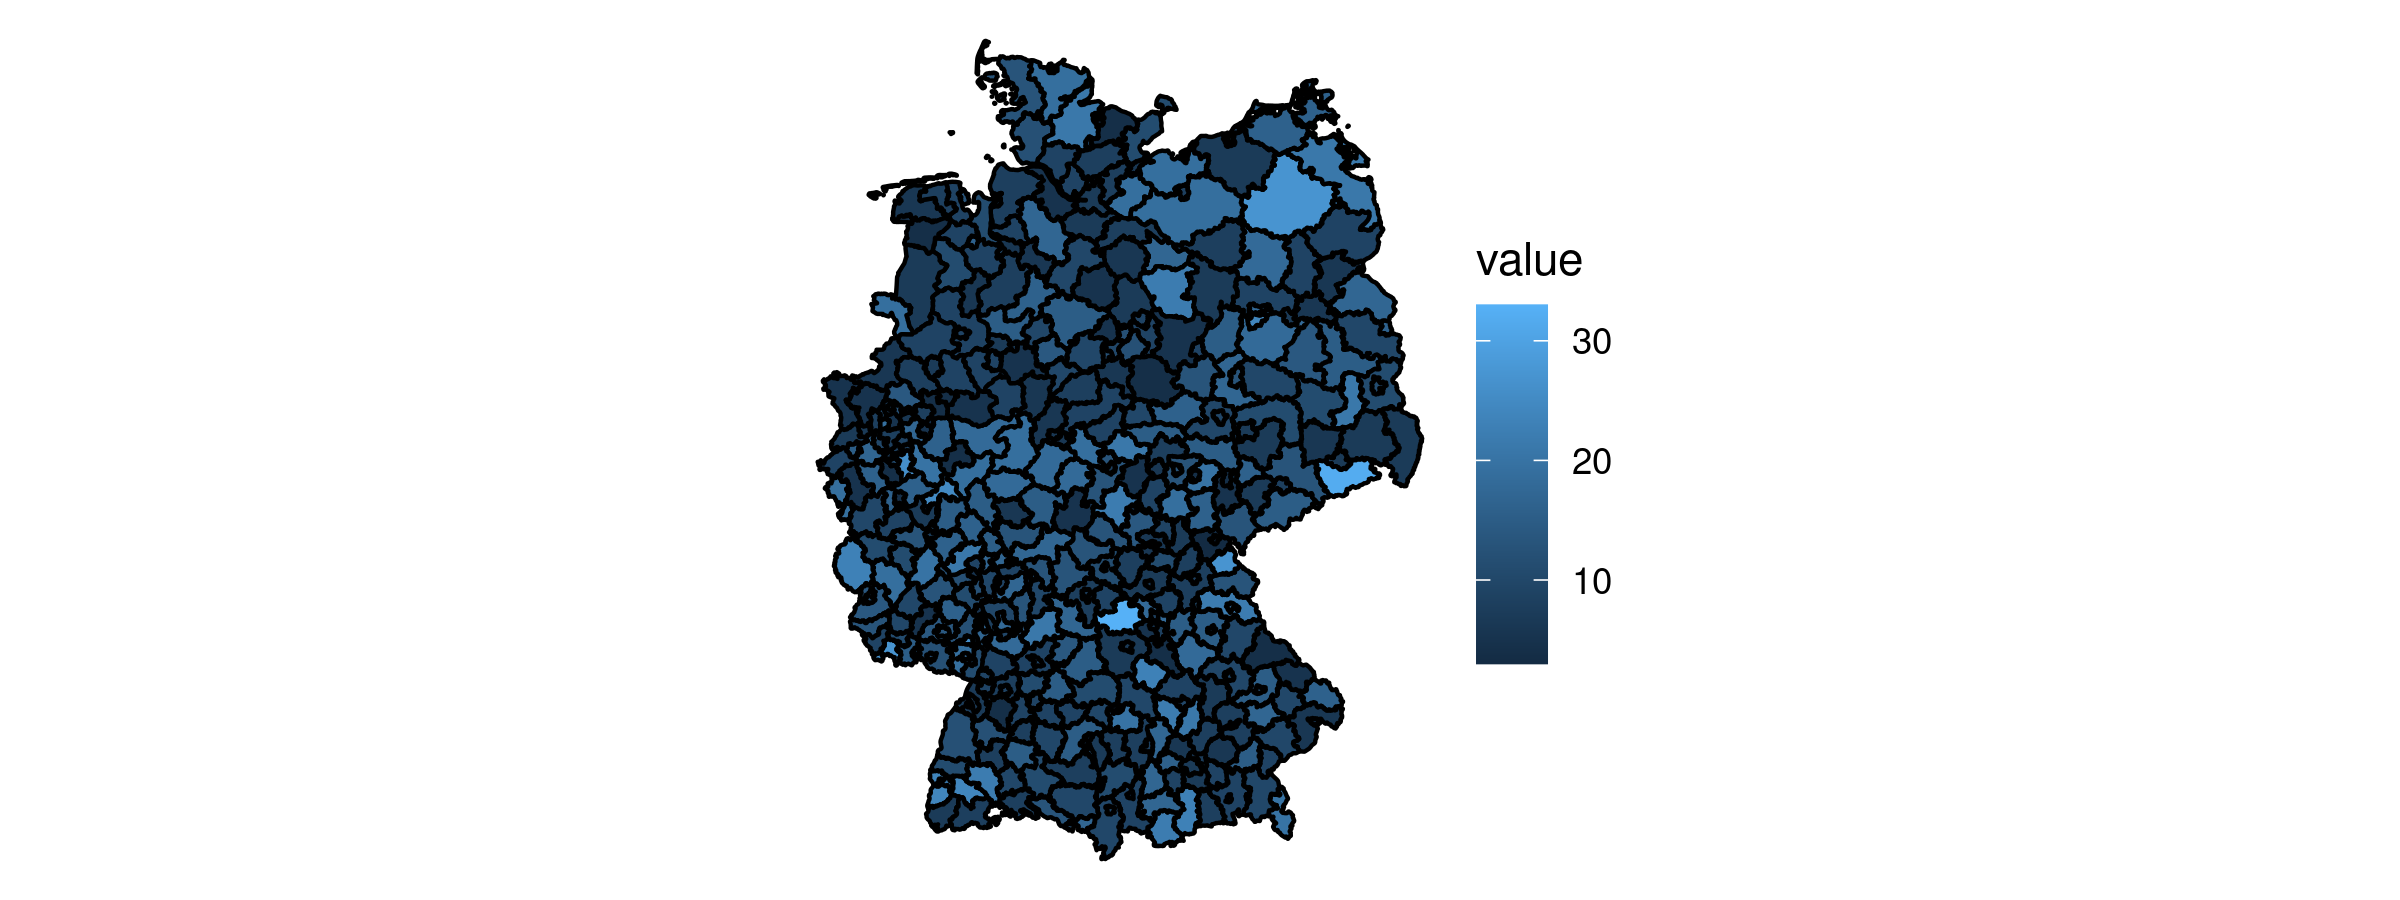

In [18]:
ggplot(
    df_shapes %>% mutate(value=str_count(GEN)) 
) +
    geom_polygon(aes(x=long,y=lat,group=group,fill=value), colour = "black") +
    theme_void() + coord_quickmap() +
    scale_fill_continuous()

Warning message:
“Ignoring unknown aesthetics: text”


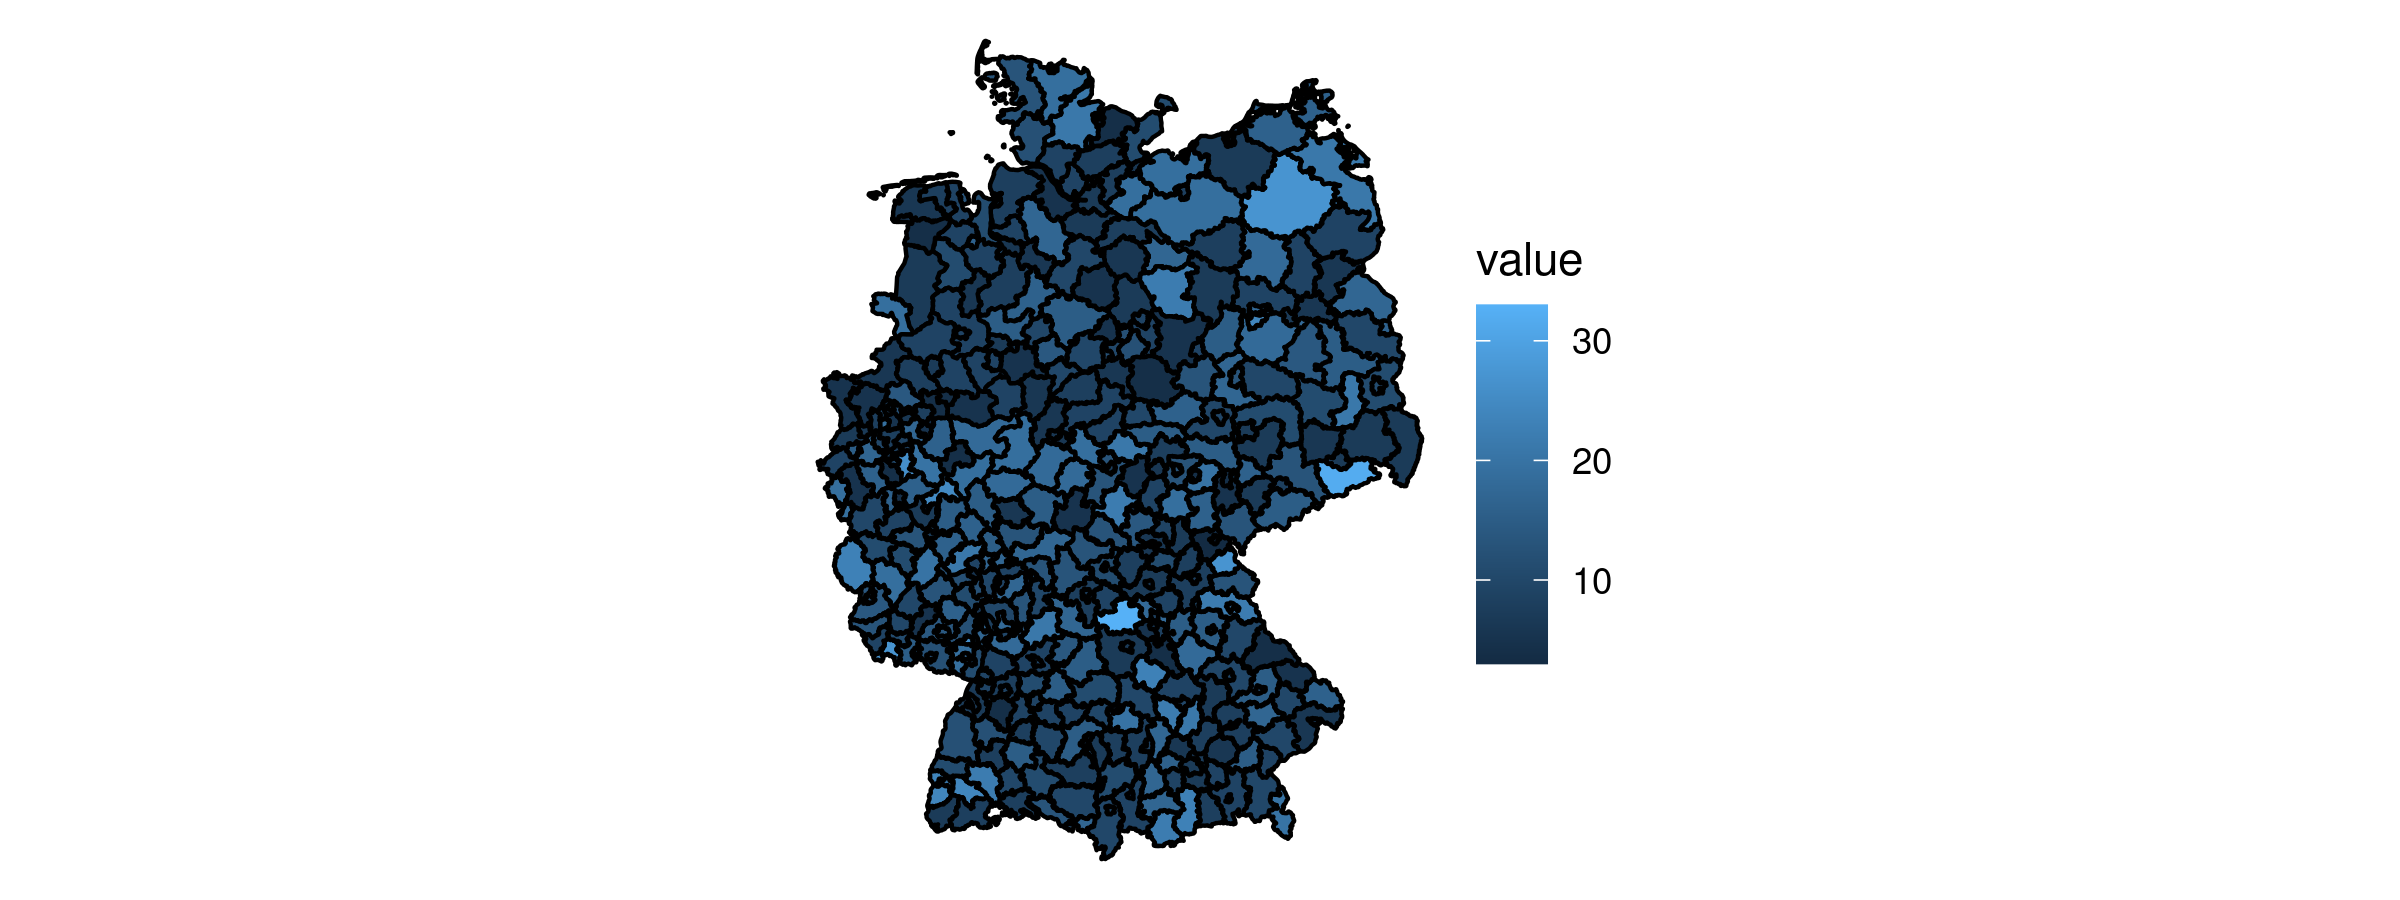

In [25]:
p <- ggplot(
    df_shapes %>% mutate(value=str_count(GEN)) 
) +
    geom_polygon(aes(x=long,y=lat,group=group,fill=value, text=GEN), colour = "black") +
    theme_void() + coord_quickmap() 
p
#ggplotly(p,tooltip=c("GEN","value"))

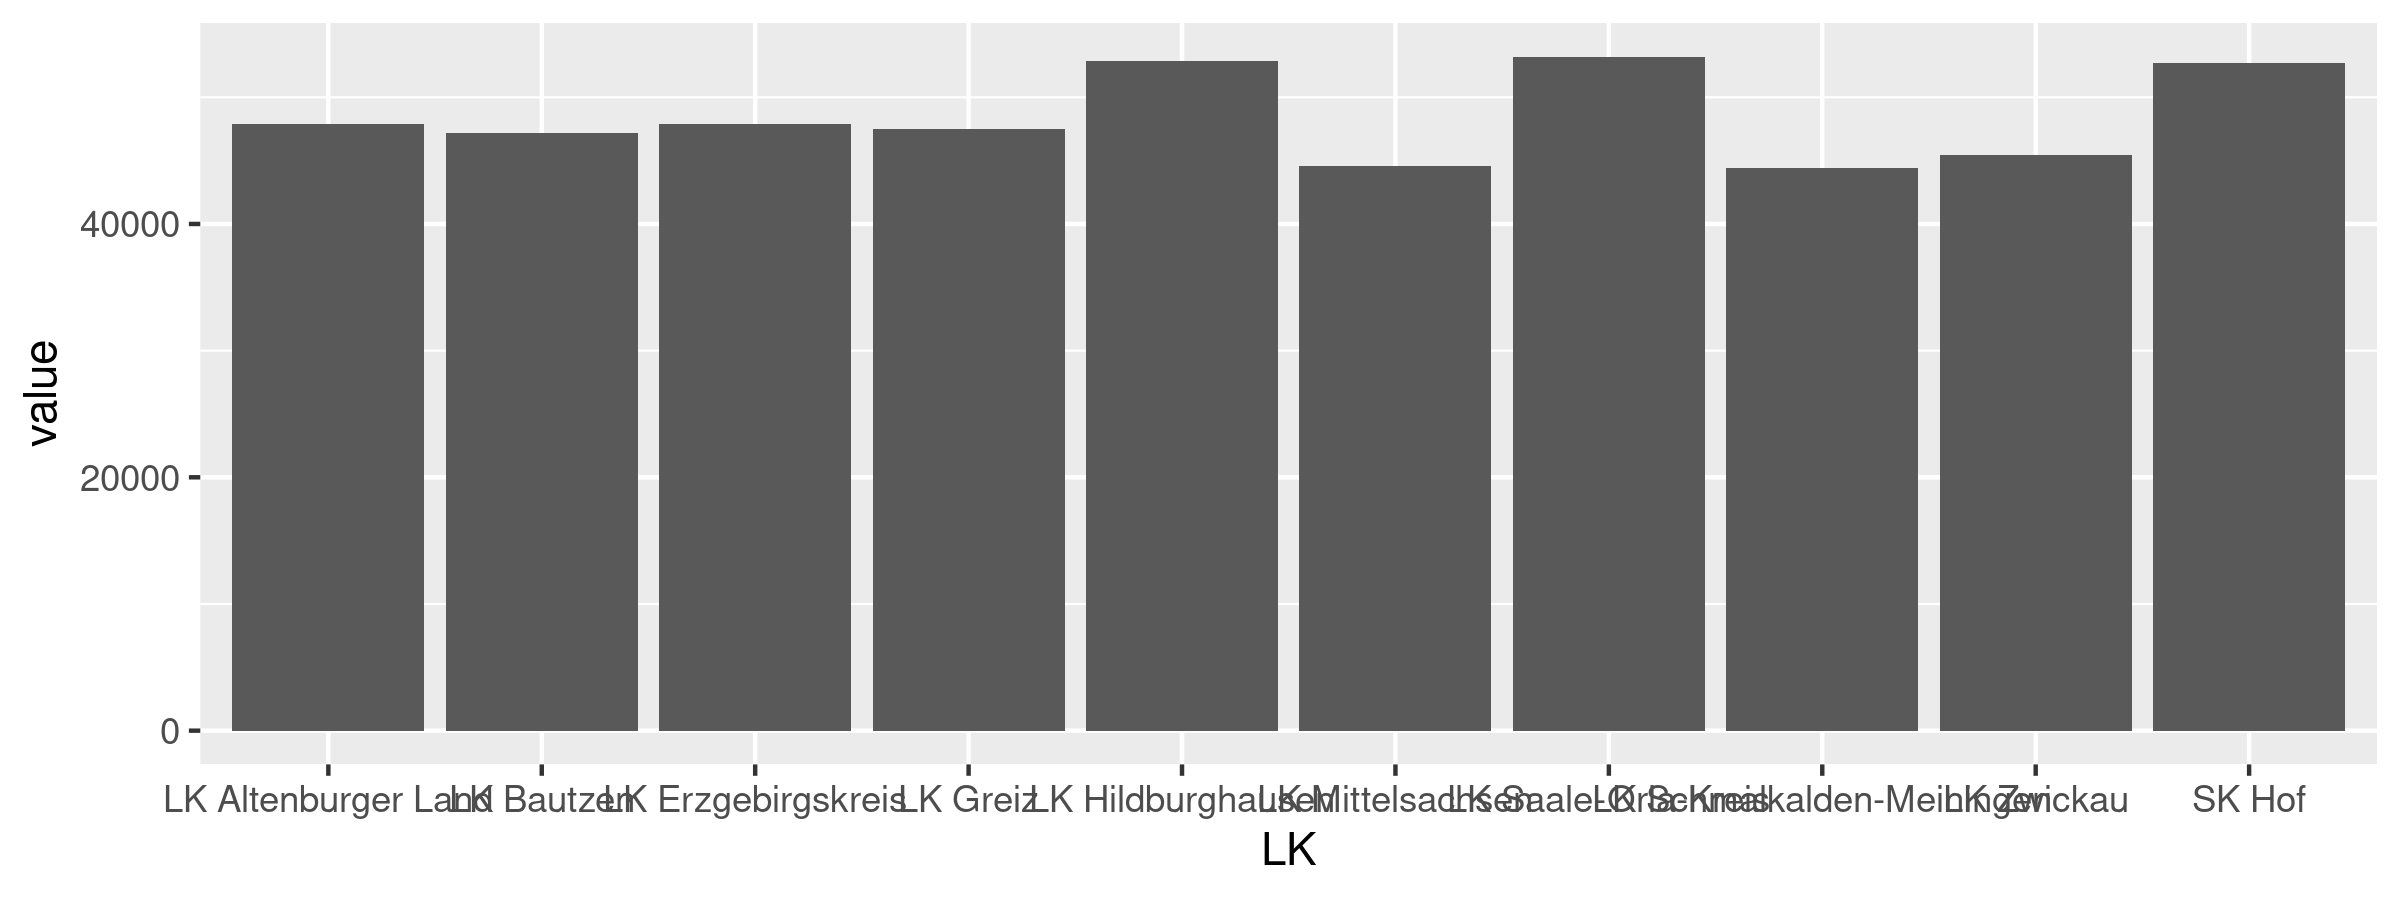

In [23]:
top10 <- df_kreisinzidenz %>% group_by(LK) %>% summarise(mean_inz=mean(value)) %>% 
            top_n(n=10,wt=mean_inz) %>% extract2("LK")
ggplot(
    df_kreisinzidenz %>% filter(LK %in% top10)
) + geom_bar(aes(x=LK,y=value),stat="identity")# + transition_states(date)